In [2]:
#Phạm Minh Tuấn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales = pd.read_csv("/content/sales data-set.csv")
features = pd.read_csv("/content/Features data set.csv")
stores = pd.read_csv("/content/stores data-set.csv")
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape,"\nColumns:",sales.columns.tolist(),"\n=============")
print("Features Total Col.",len(features.columns),"\nShape:", features.shape, "\nColumns:",features.columns.tolist(),"\n=============")
print("Stores Total Col.",len(stores.columns),"\nShape:",stores.shape, "\nColumns:",stores.columns.tolist())
def insight(df):
  print("--------------------")
  print(df.head())
insight(sales)
insight(features)
insight(stores)

Sales Total Col. 5 
Shape: (266719, 5) 
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'] 
Features Total Col. 12 
Shape: (8190, 12) 
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 
Stores Total Col. 3 
Shape: (45, 3) 
Columns: ['Store', 'Type', 'Size']
--------------------
   Store  Dept        Date  Weekly_Sales IsHoliday
0      1     1  05/02/2010      24924.50     False
1      1     1  12/02/2010      46039.49      True
2      1     1  19/02/2010      41595.55     False
3      1     1  26/02/2010      19403.54     False
4      1     1  05/03/2010      21827.90     False
--------------------
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN     

<ipython-input-3-90fcbcb00b85>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv("/content/sales data-set.csv")


Merge All Dataset

In [6]:
print("Final Dataset Col:",len(final.columns),"\nShape: ",final.shape,"\nColumns",final.columns.tolist())
final = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])
final = final.merge(stores, how= "left", on=['Store'])
final.head()

Final Dataset Col: 16 
Shape:  (266719, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [7]:
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

<ipython-input-7-ef425cb00727>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
<ipython-input-7-ef425cb00727>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,1,1,1,171100,190319,177529,171842,171100,1,1,0,0
null values{%},0.0,0.0,0.0,0.0,0.000375,0.000375,0.000375,64.149911,71.355621,66.560313,64.428106,64.149911,0.000375,0.000375,0.0,0.0


Mark Down has Huge amount of missing values so, we can fill the Missing Values using fillna(-9999)

In [8]:
final.fillna(-9999, inplace=True)
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

<ipython-input-8-188a51851ab3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
<ipython-input-8-188a51851ab3>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values{%},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, you can check that we have fill all missing values.
Now We are going to check duplicate values and remove them

In [11]:
print("Duplicate Values : ",final.duplicated().sum())

final = final.applymap(lambda x: 1 if x == True else x)
final = final.applymap(lambda x: 0 if x == False else x)

final.head()

Duplicate Values :  0


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.350143,8.106,A,151315


           Date  Weekly_Sales
112  24/12/2010   58570141.38
107  23/12/2011   55342539.12
117  25/11/2011   46853014.26
122  26/11/2010   46487826.94
79   17/12/2010   44463660.28
74   16/12/2011   42939812.26
46   10/12/2010   39830417.47
41   09/12/2011   39442630.23
25   06/04/2012   37538252.02
27   06/07/2012   35691480.22


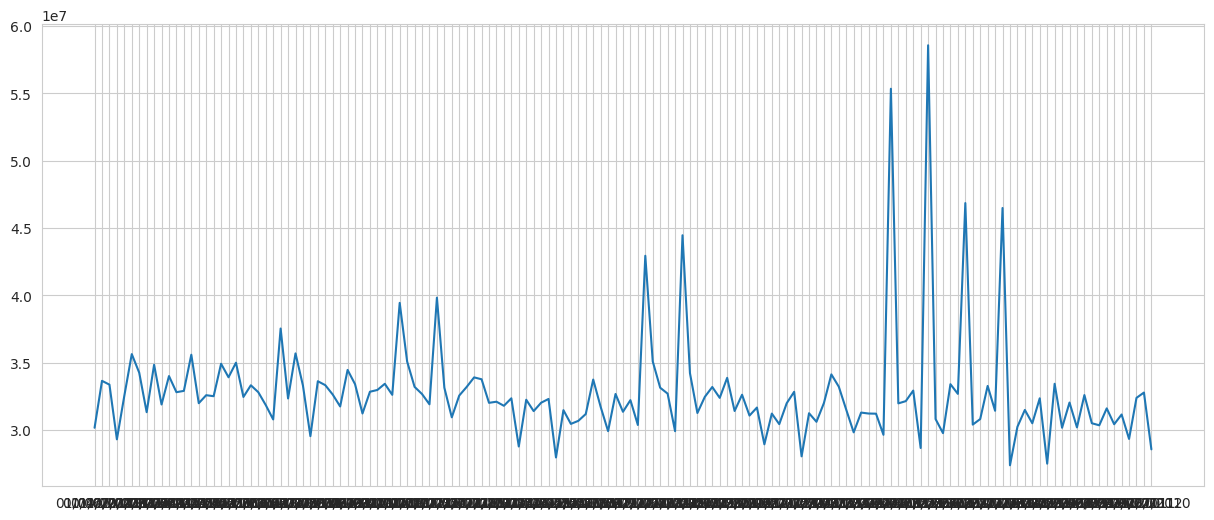

In [12]:
#Average Sales for all store/department for Week
df_average_sales_week = final.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)
print(df_average_sales[:10])
#Seasonality vs Trend Analysis
plt.figure(figsize=(15,6))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

Once again we checked the Co-relation between weekly Sales and Holiday.

   IsHoliday  Weekly_Sales
0      -9999  2.286200e+04
1          0  4.341993e+09
2          1  3.541460e+08


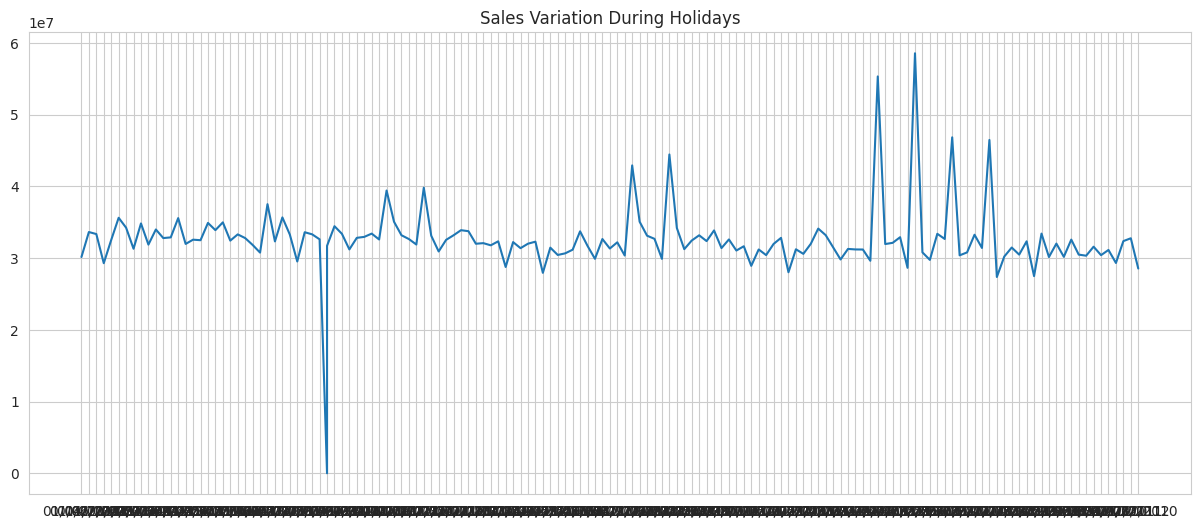

In [19]:
#Sales variation during Holidays(Store/Dept)
holiday = final[['Date', 'IsHoliday', 'Weekly_Sales']].copy()
holiday = holiday.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
holiday_group = holiday.groupby(by=['IsHoliday'], as_index=False)['Weekly_Sales'].sum()
print( holiday_group)
#print( holiday[:5])
def holiday_sales(df):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(15,6))
  labels = ['Date', 'IsHoliday_x', 'Weekly_Sales']
  plt.title('Sales Variation During Holidays')
  plt.plot(df.Date, df.Weekly_Sales)
  plt.show()

holiday_sales(holiday)

In [20]:
final['Return'] = (final['Weekly_Sales'] < 0).astype('int')
final_group = final.groupby(['Return'], as_index = False)['Weekly_Sales'].sum()
final_group

,Return,Weekly_Sales
0,0,4.696215e+09
1,1,-5.341195e+04


For the better prediction I thought to add Weekly average MarkDown across all the MarkDowns

In [21]:
#Making Avg MarkDown
final['AvgMarkDown'] = final['MarkDown1'] + final['MarkDown2'] + final['MarkDown3'] + final['MarkDown4'] + final['MarkDown5']
final['AvgMarkDown'] = final['AvgMarkDown'] / 5
final.AvgMarkDown[378:385]

378     5134.336
379     2559.290
380    11375.348
381     5931.116
382     4573.182
383     1932.570
384     1232.974
Name: AvgMarkDown, dtype: float64

In [22]:
#Creating Weekly sales in a 4 range
final['cum_sum'] = final.Weekly_Sales.cumsum()
final['cum_perc'] = 100*final.cum_sum/final.Weekly_Sales.sum()
final['rangeA'] = 0
final['rangeA'][final['cum_perc'] <= 25] = 1
final['rangeB'] = 0
final['rangeB'][(final['cum_perc'] > 25) & (final['cum_perc'] <= 50)] = 1
final['rangeC'] = 0
final['rangeC'][(final['cum_perc'] > 50) & (final['cum_perc'] <= 75)] = 1
final['rangeD'] = 0
final['rangeD'][final['cum_perc'] > 75] = 1
final = final.drop(['cum_perc', 'cum_sum'], 1)
final.head(100)

<ipython-input-22-cea58ca521f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['rangeA'][final['cum_perc'] <= 25] = 1
<ipython-input-22-cea58ca521f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['rangeB'][(final['cum_perc'] > 25) & (final['cum_perc'] <= 50)] = 1
<ipython-input-22-cea58ca521f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['rangeC'][(final['cum_perc'] > 50) & (final['cum_perc'] <= 75)] = 1
<ip

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Return,AvgMarkDown,rangeA,rangeB,rangeC,rangeD
0,1,1,05/02/2010,24924.50,0,42.31,2.572,-9999.00,-9999.00,-9999.00,...,211.096358,8.106,A,151315,0,-9999.000,1,0,0,0
1,1,1,12/02/2010,46039.49,1,38.51,2.548,-9999.00,-9999.00,-9999.00,...,211.242170,8.106,A,151315,0,-9999.000,1,0,0,0
2,1,1,19/02/2010,41595.55,0,39.93,2.514,-9999.00,-9999.00,-9999.00,...,211.289143,8.106,A,151315,0,-9999.000,1,0,0,0
3,1,1,26/02/2010,19403.54,0,46.63,2.561,-9999.00,-9999.00,-9999.00,...,211.319643,8.106,A,151315,0,-9999.000,1,0,0,0
4,1,1,05/03/2010,21827.90,0,46.50,2.625,-9999.00,-9999.00,-9999.00,...,211.350143,8.106,A,151315,0,-9999.000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,02/12/2011,25293.49,0,48.91,3.172,5629.51,68.00,1398.11,...,218.714733,7.866,A,151315,0,5931.116,1,0,0,0
96,1,1,09/12/2011,33305.92,0,43.93,3.158,4640.65,19.00,105.02,...,218.961846,7.866,A,151315,0,4573.182,1,0,0,0
97,1,1,16/12/2011,45773.03,0,51.63,3.159,5011.32,67.00,347.37,...,219.179453,7.866,A,151315,0,1932.570,1,0,0,0
98,1,1,23/12/2011,46788.75,0,47.96,3.112,2725.36,40.48,634.70,...,219.357722,7.866,A,151315,0,1232.974,1,0,0,0


For our exploration analysis we started aggregating the weekly sales with store type because we wanted to know which Store and Type of store
was having the most sales, on average

In [23]:
#Aggregate the Top performing stores interms of sales
top_stores = final.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
top_stores

,Type,Weekly_Sales
0,A,3.016518e+09
1,B,1.679643e+09


Correlation Matrix & Heatmap¶

In [24]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'AvgMarkDown', 'rangeA',
'rangeB', 'rangeC', 'rangeD', 'Return']].copy()

clm.corr()

<ipython-input-24-50e76a3ba5fc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clm.corr()


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,AvgMarkDown,rangeA,rangeB,rangeC,rangeD,Return
Weekly_Sales,1.000000,0.011078,-0.000166,-0.067526,0.000065,0.249906,0.025336,0.018768,0.036406,0.021048,0.025400,0.030317,0.013536,0.013584,-0.007920,-0.018580,-0.038771
Temperature,0.011078,1.000000,0.725465,0.465089,0.721920,0.042212,-0.001666,-0.097273,-0.031321,-0.013318,-0.014108,-0.036774,0.143828,0.119880,-0.153925,-0.104379,-0.000232
Fuel_Price,-0.000166,0.725465,1.000000,0.440464,0.996475,-0.000911,0.011500,0.006050,0.007562,0.010938,0.011581,0.011370,-0.003086,0.000702,0.003019,-0.000671,0.000222
CPI,-0.067526,0.465089,0.440464,1.000000,0.422259,-0.106256,0.023758,0.015911,0.024518,0.025028,0.050100,0.032531,0.358115,0.020164,-0.173085,-0.197056,-0.004924
Unemployment,0.000065,0.721920,0.996475,0.422259,1.000000,-0.001236,-0.011744,-0.008608,-0.009506,-0.013064,-0.015313,-0.013762,-0.013999,0.015027,0.005419,-0.006376,0.000602
Size,0.249906,0.042212,-0.000911,-0.106256,-0.001236,1.000000,0.070367,0.057598,0.031323,0.050226,0.055481,0.064021,-0.100643,0.073523,-0.037904,0.064028,-0.007194
MarkDown1,0.025336,-0.001666,0.011500,0.023758,-0.011744,0.070367,1.000000,0.560543,0.507433,0.951564,0.828638,0.923231,-0.022954,0.005799,-0.002465,0.019166,-0.001743
MarkDown2,0.018768,-0.097273,0.006050,0.015911,-0.008608,0.057598,0.560543,1.000000,0.386411,0.556181,0.591182,0.735878,-0.009089,-0.004432,0.005286,0.007937,0.003756
MarkDown3,0.036406,-0.031321,0.007562,0.024518,-0.009506,0.031323,0.507433,0.386411,1.000000,0.514688,0.584002,0.709795,-0.006159,0.006641,-0.000127,-0.000344,-0.001886
MarkDown4,0.021048,-0.013318,0.010938,0.025028,-0.013064,0.050226,0.951564,0.556181,0.514688,1.000000,0.818476,0.918170,-0.012940,-0.005618,0.001011,0.017086,-0.001919


<ipython-input-26-907a0d56a116>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 50)
<ipython-input-26-907a0d56a116>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
<ipython-input-26-907a0d56a116>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize=6)
<ipython-input-26-907a0d56a116>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels, fontsize=6)


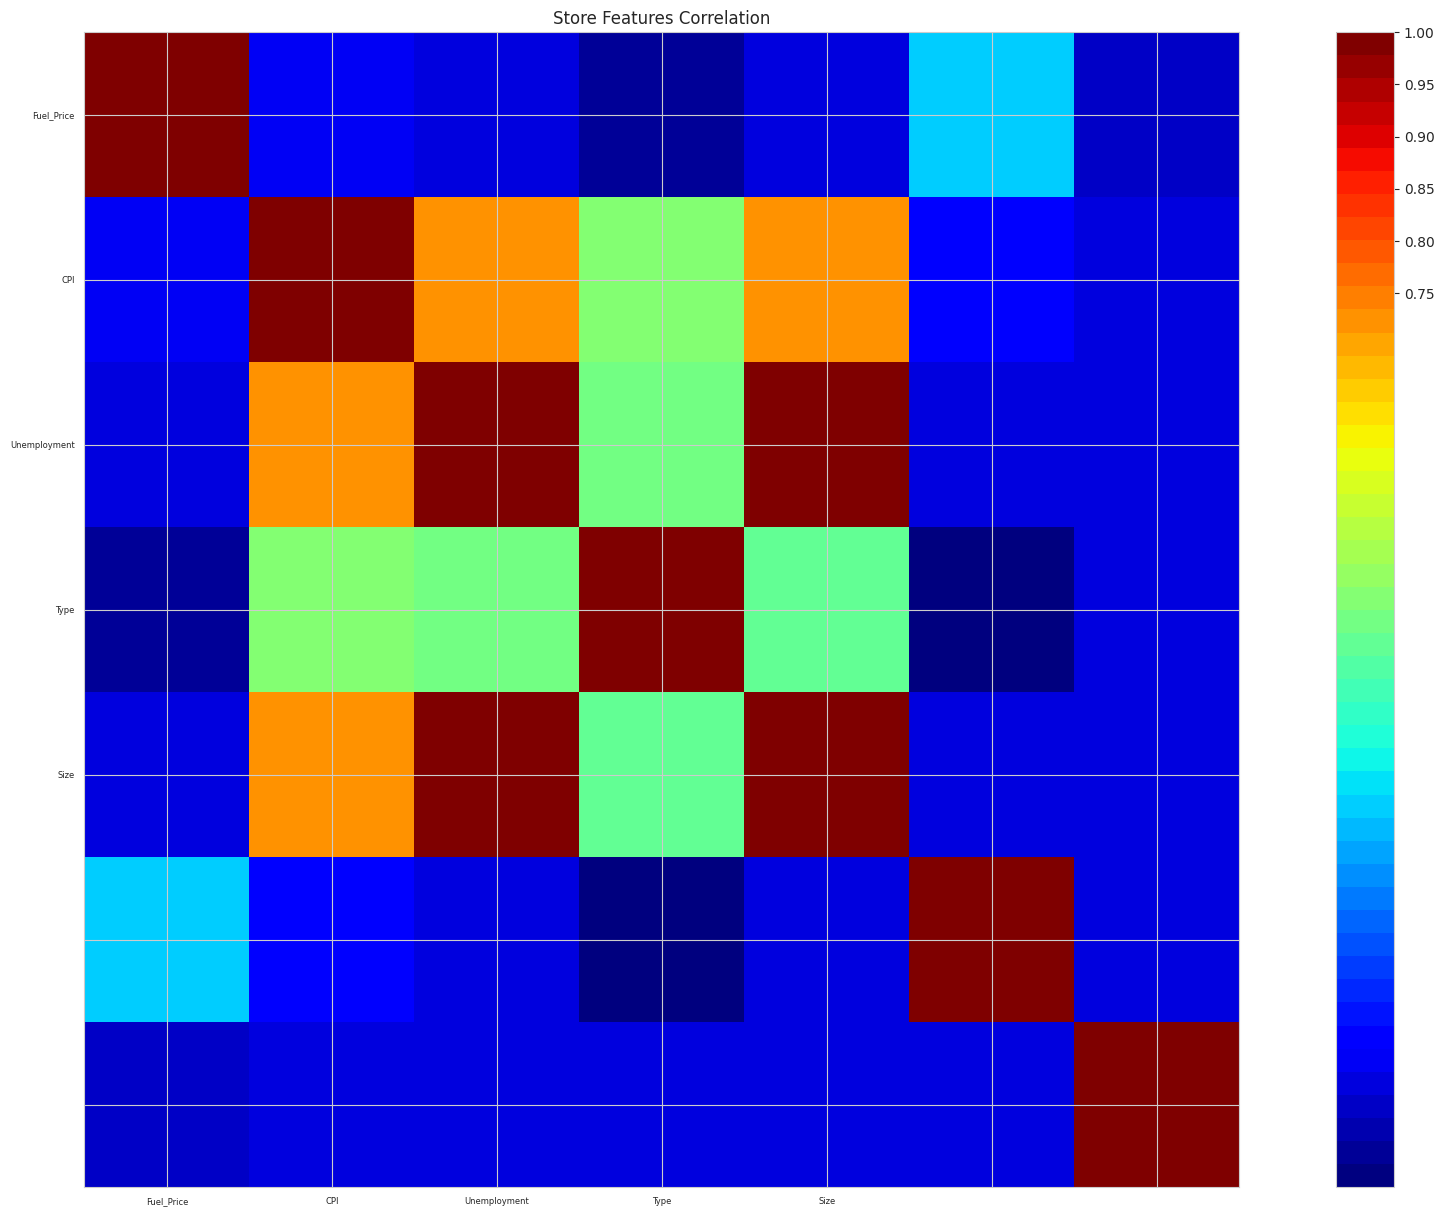

In [26]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',

'Return']].copy()
def correlation_matrix(df):
  from matplotlib import pyplot as plt
  from matplotlib import cm as cm
  fig = plt.figure(figsize = (25,15))
  ax1 = fig.add_subplot(111)
  cmap = cm.get_cmap('jet', 50)
  cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
  ax1.grid(True)
  plt.title('Store Features Correlation')
  labels=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']
  ax1.set_xticklabels(labels, fontsize=6)
  ax1.set_yticklabels(labels, fontsize=6)
  #Add colorbar to make sure to specify a tick location to match desired tick labels
  fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])
  plt.show()

correlation_matrix(clm)
